In [27]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

Generate dataset according to the following polynomia.
$$y = 0.05 + \sum_{i=1}^d 0.01 x_i + \epsilon \ where \  \epsilon \sim \mathcal{N}(0 , 0.01^2)$$


In [28]:
n_train , n_test , num_inputs , batch_size = 20 , 100 , 200 , 5
true_w , true_b = torch.ones((num_inputs , 1)) * 0.01 , 0.05
train_data = d2l.synthetic_data(true_w , true_b , n_train)
train_iter = d2l.load_array(train_data , batch_size)
test_data = d2l.synthetic_data(true_w , true_b , n_test)
test_iter = d2l.load_array(test_data , batch_size , is_train=False)

In [29]:
def init_params():
    w = torch.normal(0 , 1 , size=(num_inputs , 1), requires_grad=True)
    b = torch.zeros(1 , requires_grad=True)
    return [w , b]

In [30]:
# l2 范数惩罚
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [31]:
def train(lambd):
    w , b = init_params()
    net , loss = lambda X : d2l.linreg(X , w , b) , d2l.squared_loss
    num_epochs , lr = 100 , 0.003
    animator = d2l.Animator(xlabel='epochs' , ylabel='loss' , yscale='log' , xlim=[5 , num_epochs] , legend=['train' , 'test'])
    for epoch in range(num_epochs):
        for X , y in train_iter:
            # with torch.enable_grad():
            l = loss(net(X) , y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w , b] , lr , batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1 , (d2l.evaluate_loss(net , train_iter , loss) , d2l.evaluate_loss(net , test_iter , loss)))
    print('the l2 norm of w : ' , torch.norm(w).item())

the l2 norm of w :  12.465816497802734


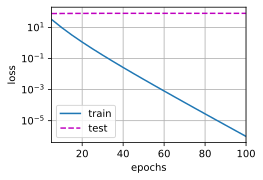

In [32]:
# train without lambda
train(lambd=0)

the l2 norm of w :  0.37460091710090637


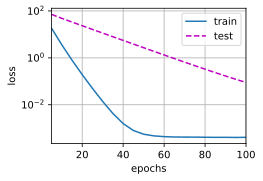

In [33]:
# train with lambda = 3 
train(lambd=3)

the l2 norm of w :  0.014536825008690357


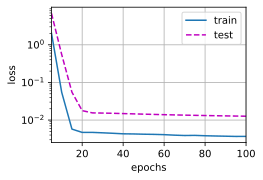

In [34]:
train(lambd=20)

In [35]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs , 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs , lr = 1000 , 0.003
    trainer = torch.optim.SGD(
        [
            {"params" : net[0].weight , 'weight_decay' : wd},
            {"params":net[0].bias}
        ],
        lr = lr
    )
    animator = d2l.Animator(
        xlabel='epochs' , ylabel='loss' , yscale='log',
        xlim = [5 , num_epochs] , legend = ['train' , 'test']
    )
    for epoch in range(num_epochs):
        for X , y in train_iter:
            trainer.zero_grad()
            l = loss(net(X) , y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1 , (d2l.evaluate_loss(net , train_iter , loss), d2l.evaluate_loss(net , test_iter , loss)))
    print('the l2 norm of w : ' , net[0].weight.norm().item())

the l2 norm of w :  12.854533195495605


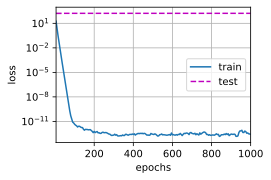

In [36]:
train_concise(0)

the l2 norm of w :  0.026149393990635872


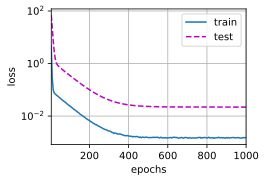

In [37]:
train_concise(10)